In [1]:
import numpy as np
from dlnumpy.layers import Dense
from dlnumpy.losses import BinaryCrossEntropy
from dlnumpy.activations import ReLU, Sigmoid
from dlnumpy.accuracy import Categorical
from dlnumpy.models import Model
from dlnumpy.optimizers import Adam
from dlnumpy.datagen import spiral
from dlnumpy.utils import plot_history

import matplotlib.pyplot as plt

In [2]:
X, y = spiral(100, 2)
X_test, y_test = spiral(100, 2)

y = y.reshape(-1,1) #reshape labels so they're no longer sparse
y_test = y_test.reshape(-1,1) 

In [3]:
model = Model()

model.add(Dense(2, 64, L2w=5e-4, L2b=5e-4))
model.add(ReLU())
model.add(Dense(64, 1))
model.add(Sigmoid())

model.set(
    loss=BinaryCrossEntropy(), 
    optimizer=Adam(lr=0.02, decay=5e-7, epsilon=1e-7, beta1=0.9, beta2=0.999), 
    accuracy_fn=Categorical(binary=True)
)

In [4]:
history = model.train(X, y, 1000, print_every=None)

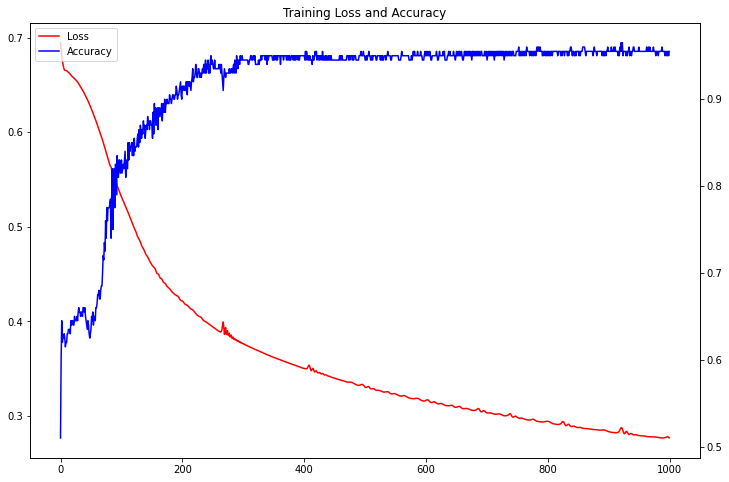

In [5]:
plot_history(history)

In [6]:
yhat = model.predict(X_test)

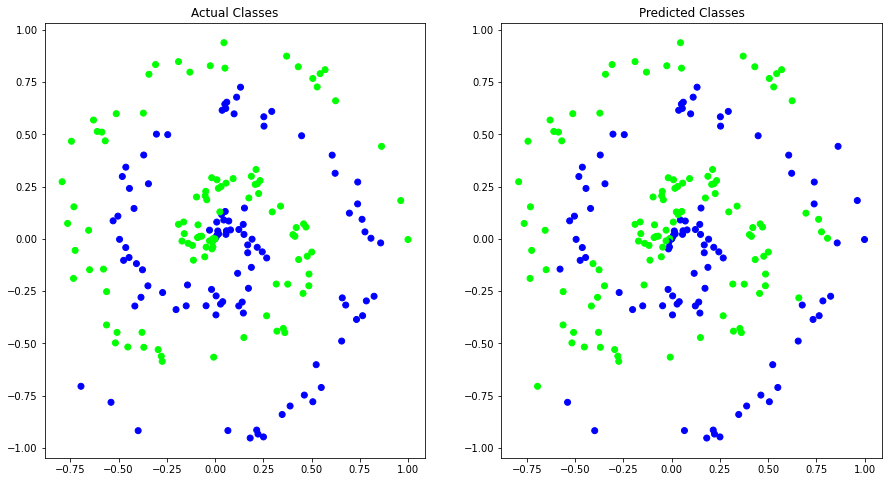

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
axes[0].scatter(X_test[:,0], X_test[:,1],c=y_test, cmap="brg")
axes[0].title.set_text("Actual Classes")

axes[1].scatter(X_test[:,0], X_test[:,1],c=yhat, cmap="brg")
axes[1].title.set_text("Predicted Classes")